# Projet : Consommation et production électrique en France

<img width=400 src="https://1.bp.blogspot.com/-_cw5mPFrxmc/XtuawSHRV0I/AAAAAAAAEWQ/52ff8l3-MKI0_ZdlJpwwyrH6tgh9diaOQCLcBGAsYHQ/s1600/uses-of-electricity-in-our-daily-life.jpg">
<p style="text-align: center"> Une  photo kitsch du réseau électrique </p>

## Présentation Du Dataset


<img src="./assets/image1.png" width="300"/>
<img src="./assets/image2.png" width="300"/>

<br>

**Informations issues du site (allez voir vous même également) :**

Ce jeu de données, rafraîchi une fois par jour, présente les données régionales de janvier 2013 à 2018. Elles sont issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. 

Vous y trouverez au pas 15 minutes :

- La consommation réalisée.
    
    
- La production selon les différentes filières composant le mix énergétique.


- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).


- Le solde des échanges avec les régions limitrophes.

<br>

<img src="./assets/image3.png" width="800"/>


## Objectifs et modalités de l'étude 

**Modalités de l'étude :** 

- Vous travaillerez en groupe de 2 à 3. 
   
   
- Une présentation de votre travail sur une question sera effectuée en fin du projet. 
   
   
- Ce projet durera entre 3 et 5 jours

--- 

**Les objectifs de cette étude sont multiples :** 

- Apprendre à charger et manipuler des données réelles complexes avec Pandas. 


- Manipuler les concepts statistiques vus précédemment : analyse univariée et multivariée.  


- Manipuler des séries temporelles. 


- Analyser des données pour répondre à une question exploratoire. 


- Présenter et vulgariser votre recherche exploratoire. 

---

**Notes sur les données RTE** 

- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata)


- Leur format n'est pas optimal : un peu de manipulation est nécessaire afin de pouvoir les exploiter. Pas de panique, il faut juste procéder par étape !
    
---

**Plus d'informations sur les données :**

- https://www.rte-france.com/eco2mix 
- https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/information/?disjunctive.nature 
- https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature



## Conseils & Remarques sur l'exploration des données

**L'importance de l'exploration des données**

La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données "réels"...  <br/> 
Cela fait partie du travail de data scientist, il faut s'y faire :-)

Histoire : <br>
It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time.  <br/> 
https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87


Autre histoire : <br>
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184


**Conseils généraux:**

- N'oubliez pas de reprendre les étapes d'exploration des donénes vues précédemment (projets "Arbres de Grenoble" et "Origine des prénoms") : afficher les informations sur vos dataframes, regardez les données, faites des sauvegardes intermédiaires (format .pkl par exemple), cherchez les outliers, les données manquantes, etc... 


- C'est une analyse exploratoire : **tatonnez**, **faîtes des graphiques**, ... 


- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données


- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

**An EDA checklist**

1. Quelle(s) question(s) essayez-vous de résoudre/de prouver que vous avez tort ?
2. De quel type de données disposez-vous et comment traitez-vous les différents types ?
3. Qu'est-ce qui manque dans les données et comment y faire face ?
4. Où sont les valeurs aberrantes et pourquoi devriez-vous vous en soucier ?
5. Comment pouvez-vous ajouter, modifier ou supprimer des fonctionnalités pour tirer le meilleur parti de vos données ?
        
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

## Chargement des données

**Remarque préliminaire :** <br>
Les données que nous allons traiter sont sous un format nouveau, il peut s'avérer difficile de les importer pour vous : fixez vous un objectif à ne pas passer plus de 2h à les importer. Si vous dépassez ce temps, je vous conseille de vous référer aux codes cachés dans un second notebook disponible sur demande. Vous pourrez vous replonger dedans plus tard afin que vous ayez le temps d'explorer les données.

&#x1F4A5; **To Do**
        
1. Charger les données dans 2 dataframes différents. 


2. Le 1er dataframe aggrégera les données nationales annuelles 
    

3. Le 2nd dataframe aggrégera les données régionales annuelles
    

4. Il faudra construire un index de datetime à partir des colonnes 'Date' et 'Heures'

## Load the data

### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import listdir
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 8
#!pip install seaborn[stats]

In [2]:
# pip install need to be used only once (so it's commented out)
# !pip install unidecode
#pip install seaborn

# Useless imports, for memory (RIP chatGPT)
# import io
# import seaborn as sns
# import zipfile
# from unidecode import unidecode

### Loading only one dataframe (testing)

In [3]:
# let's see what's inside the data folder: names of the zip files inside the folder
folder_path = 'data_rte'
list_of_filenames = os.listdir(folder_path)

# Just showing the 3 first elements
list_of_filenames[:3]

['eCO2mix_RTE_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_PACA_Annuel-Definitif_2014.zip']

In [4]:
# the complete data path includes the data folder
file_name = os.path.join(folder_path, list_of_filenames[0])
file_name

'data_rte/eCO2mix_RTE_Annuel-Definitif_2017.zip'

In [5]:
# let's try to open the dataframe
test_df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=False, na_values= ['ND', '-', 'NA'])

test_df.head(2)

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
1,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dropping the last line, because it's weird
test_df.drop([len(test_df) - 1], inplace=True)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Périmètre                             35040 non-null  object 
 1   Nature                                35040 non-null  object 
 2   Date                                  35040 non-null  object 
 3   Heures                                35040 non-null  object 
 4   Consommation                          17520 non-null  float64
 5   Prévision J-1                         35040 non-null  float64
 6   Prévision J                           35040 non-null  float64
 7   Fioul                                 17520 non-null  float64
 8   Charbon                               17520 non-null  float64
 9   Gaz                                   17520 non-null  float64
 10  Nucléaire                             17520 non-null  float64
 11  Eolien         

### Loading all the national data

In [8]:
folder_path = 'data_rte'
list_of_filenames = os.listdir(folder_path)

In [9]:
list_of_national_filenames = []
for filename in list_of_filenames:
    if "eCO2mix_RTE_Annuel-Definitif_" in filename:
        full_path_to_file = os.path.join(folder_path, filename)
        list_of_national_filenames.append(full_path_to_file)

list_of_national_filenames[:2]

['data_rte/eCO2mix_RTE_Annuel-Definitif_2017.zip',
 'data_rte/eCO2mix_RTE_Annuel-Definitif_2015.zip']

In [10]:
list_national_dfs = [] # list of dfs
for filename in list_of_national_filenames:
    df = pd.read_csv(filename, encoding='ISO-8859-1', sep='\t', index_col=False, na_values=['ND', '-', 'NA']) # create a df
    df.drop([len(df) - 1], inplace=True) # remove the last line of the df
    list_national_dfs.append(df) # save the df in the list
    
raw_national_df = pd.concat(list_national_dfs) # we add up all the dfs into one big one
raw_national_df.head(3)

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
1,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0


In [11]:
df_national_clean = raw_national_df.copy() # create a copy of the original df

# Create a column with datetimes
df_national_clean["date_time"] = pd.to_datetime(df_national_clean['Date'] + ' ' + df_national_clean['Heures']) # create a column named "date and time" and put it the date and time

# Set the column as an index
df_national_clean.set_index('date_time', inplace=True)

# Other option (more elegant)
# df_national_clean.index = pd.to_datetime(df_national_clean['Date'] + ' ' + df_national_clean['Heures']) # create a column named "date and time" and put it the date and time

In [12]:
df_national_clean.head(3)

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
date_time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
2017-01-01 00:15:00,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0


In [13]:
df_national_clean.sort_index(inplace=True) # sort the dates chronologically

In [14]:
df_national_clean.drop(['Périmètre', "Nature", "Date", "Heures"], inplace=True, axis=1)
# axis=1 means that i want to drop columns, and not lines

In [15]:
df_national_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245472 entries, 2012-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 32 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Consommation                          122736 non-null  float64
 1   Prévision J-1                         245472 non-null  float64
 2   Prévision J                           245472 non-null  float64
 3   Fioul                                 122736 non-null  float64
 4   Charbon                               122736 non-null  float64
 5   Gaz                                   122736 non-null  float64
 6   Nucléaire                             122736 non-null  float64
 7   Eolien                                122736 non-null  float64
 8   Solaire                               122736 non-null  float64
 9   Hydraulique                           122736 non-null  float64
 10  Pompage                           

In [16]:
df_national_clean['Ech. comm. Angleterre'] # looking at what's inside the column of type "object"

# we can't see all the values, it's too big

date_time
2012-01-01 00:00:00   -1750.0
2012-01-01 00:15:00       NaN
2012-01-01 00:30:00   -1750.0
2012-01-01 00:45:00       NaN
2012-01-01 01:00:00   -1750.0
                        ...  
2018-12-31 22:45:00       NaN
2018-12-31 23:00:00   -1168.0
2018-12-31 23:15:00       NaN
2018-12-31 23:30:00   -1168.0
2018-12-31 23:45:00       NaN
Name: Ech. comm. Angleterre, Length: 245472, dtype: float64

In [17]:
# let's count all different values
df_national_clean['Ech. comm. Angleterre'].value_counts()

Ech. comm. Angleterre
-2000.0    36925
-1000.0    11616
-1500.0    11326
 1000.0     1852
-1802.0     1759
           ...  
 2066.0        1
-2463.0        1
-2393.0        1
-2178.0        1
-2289.0        1
Name: count, Length: 3513, dtype: int64

In [18]:
column_list = df_national_clean.columns.tolist()
print(column_list)

['Consommation', 'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse', 'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.', 'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG', 'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée', 'Hydraulique - Lacs', 'Hydraulique - STEP turbinage', 'Bioénergies - Déchets', 'Bioénergies - Biomasse', 'Bioénergies - Biogaz']


In [19]:
df_national_clean = df_national_clean.dropna()

In [20]:
df_national_clean.to_pickle('./data_shahaf_rte_national.pkl') 

### Statistical caculations national


In [21]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 8

In [22]:
df_national_clean = pd.read_pickle('./data_shahaf_rte_national.pkl')

In [23]:
df_national_clean.describe()

,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
count,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,...,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000,105113.000000
mean,54445.172595,54125.275637,54069.226119,309.416894,1132.865716,3071.545508,45473.155889,2419.601876,865.411462,7310.117683,...,23.386613,1201.188597,1762.510755,84.695556,4740.881023,1879.307231,689.879377,483.186828,239.343782,215.417008
std,12033.316616,11945.898094,11929.732611,258.431386,1135.804245,2405.332181,6603.423161,1922.616576,1294.863704,2811.326920,...,85.041652,996.706022,1753.368730,95.504429,1629.693540,1059.457019,767.667529,71.659839,70.502344,40.674326
min,29477.000000,28500.000000,0.000000,18.000000,0.000000,234.000000,26369.000000,21.000000,0.000000,1387.000000,...,0.000000,164.000000,0.000000,3.000000,1237.000000,47.000000,0.000000,229.000000,111.000000,111.000000
25%,45268.000000,45000.000000,45100.000000,151.000000,23.000000,755.000000,40582.000000,1040.000000,0.000000,5175.000000,...,0.000000,362.000000,223.000000,47.000000,3344.000000,1066.000000,2.000000,434.000000,178.000000,179.000000
50%,52780.000000,52500.000000,52400.000000,241.000000,884.000000,2443.000000,44182.000000,1832.000000,12.000000,7179.000000,...,2.000000,468.000000,962.000000,66.000000,4896.000000,1723.000000,404.000000,486.000000,241.000000,214.000000
75%,62948.000000,62400.000000,62400.000000,389.000000,1736.000000,4736.000000,50494.000000,3241.000000,1490.000000,9293.000000,...,6.000000,2228.000000,3210.000000,85.000000,6075.000000,2513.000000,1164.000000,540.000000,282.000000,247.000000
max,96272.000000,95400.000000,96200.000000,4231.000000,6265.000000,9700.000000,61712.000000,12287.000000,6430.000000,17434.000000,...,651.000000,3396.000000,6006.000000,656.000000,8298.000000,6505.000000,4179.000000,702.000000,560.000000,399.000000


In [24]:
columns_to_plot = ['Nucléaire', 'Fioul', 'Charbon', 'Gaz']
df_national_clean[columns_to_plot]

,Nucléaire,Fioul,Charbon,Gaz
date_time,,,,
2013-01-01 00:30:00,50485.0,473.0,0.0,3448.0
2013-01-01 01:00:00,50070.0,472.0,0.0,3231.0
2013-01-01 01:30:00,50425.0,473.0,0.0,3240.0
2013-01-01 02:00:00,50247.0,472.0,0.0,3230.0
2013-01-01 02:30:00,49890.0,472.0,0.0,3224.0
...,...,...,...,...
2018-12-31 21:30:00,55679.0,170.0,12.0,3825.0
2018-12-31 22:00:00,55404.0,146.0,11.0,3568.0
2018-12-31 22:30:00,55186.0,146.0,11.0,3886.0


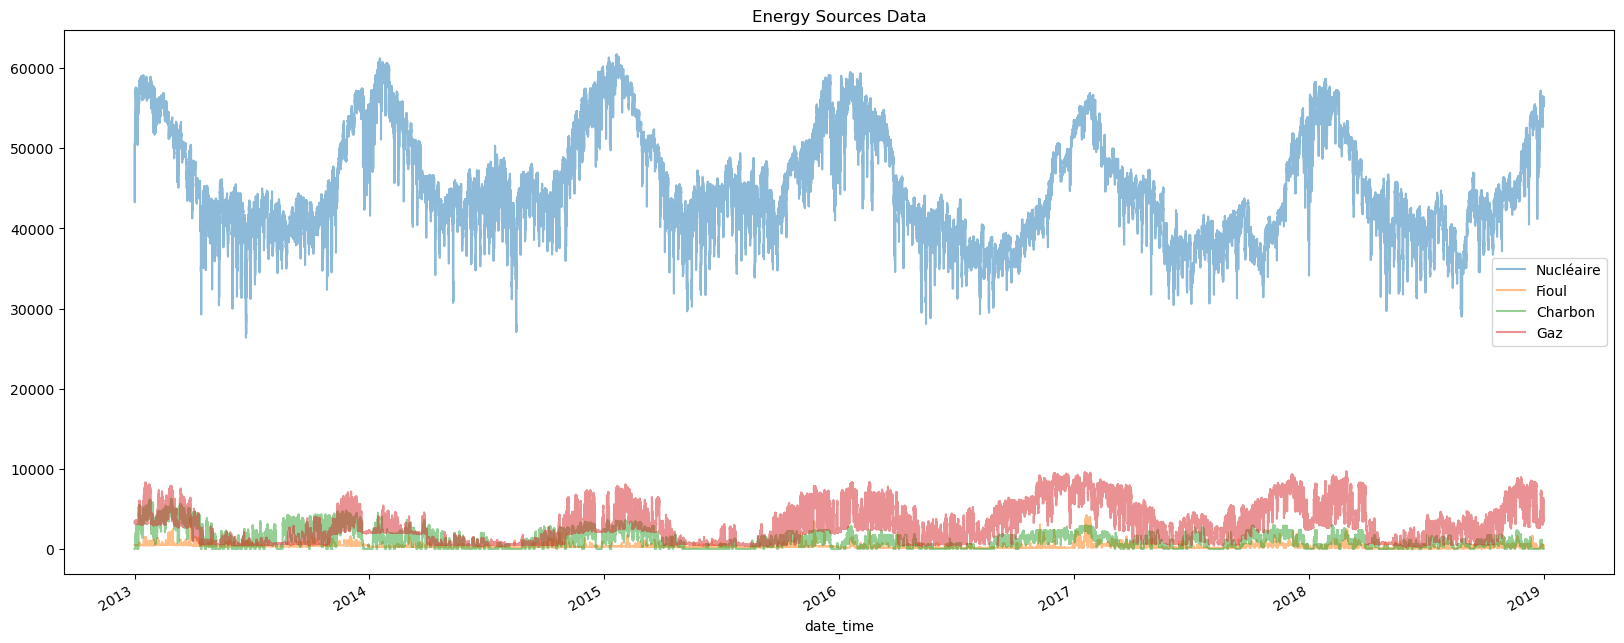

In [25]:
columns_to_plot = ['Nucléaire', 'Fioul', 'Charbon', 'Gaz']
df_national_clean[columns_to_plot].dropna().plot(alpha=0.5)
plt.title("Energy Sources Data")
#plt.scatter(df_national_clean.index, df_national_clean[columns_to_plot], color="orangered", s=20)
plt.show()

Text(0.5, 1.0, 'Energy Sources Data')

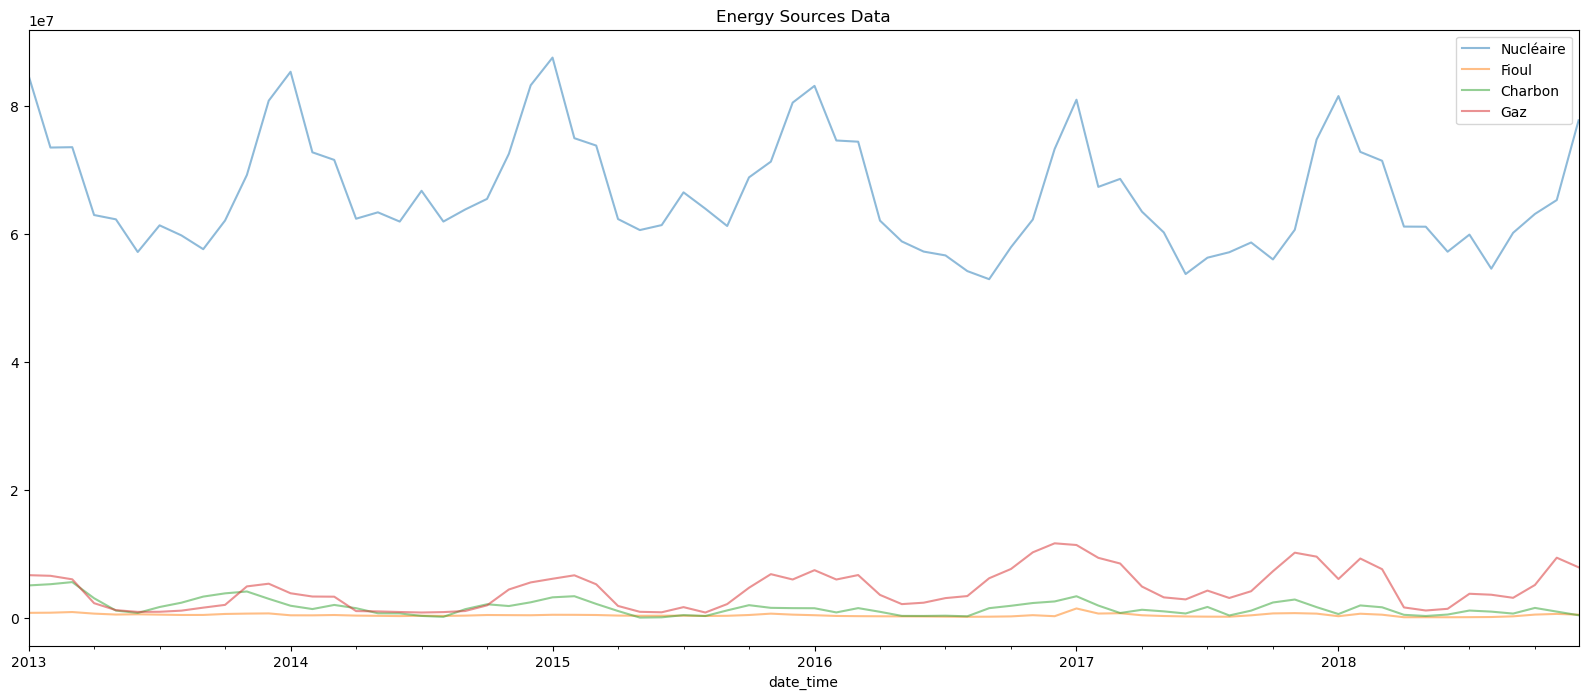

In [26]:
df_national_clean[columns_to_plot].resample('1M').sum().dropna().plot(alpha=0.5)
plt.title("Energy Sources Data")

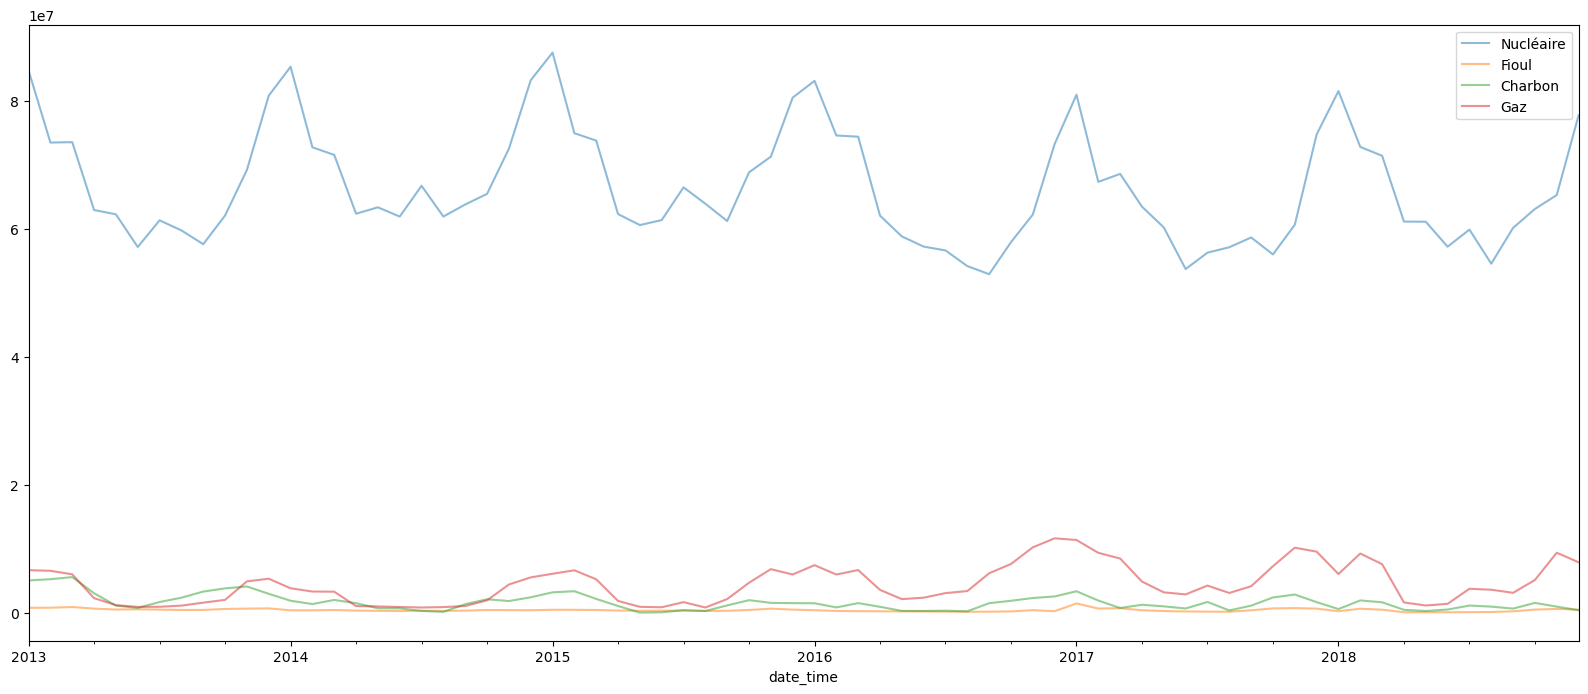

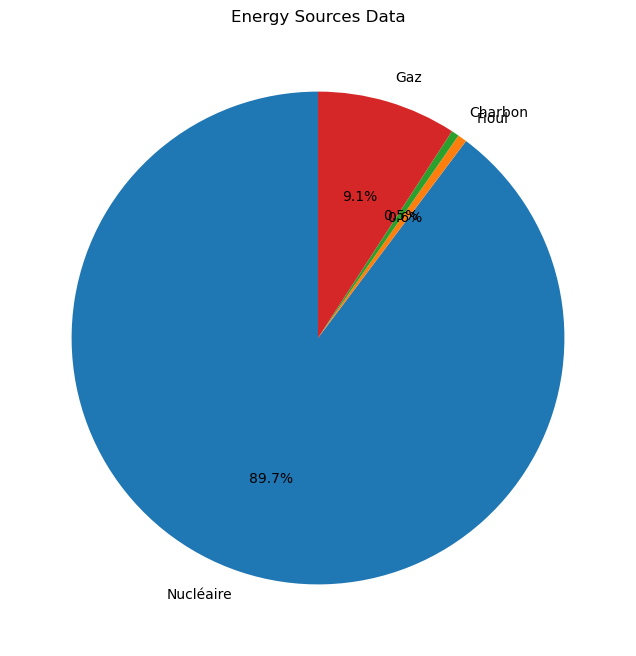

In [27]:
df_national_clean[columns_to_plot].resample('1M').sum().dropna().plot(alpha=0.5)
plt.figure() # Create a new figure for the pie chart
sum_by_month = df_national_clean[columns_to_plot].resample('1M').sum().dropna().iloc[-1] # Sum data for the last month
plt.pie(sum_by_month, labels=sum_by_month.index, autopct='%1.1f%%', startangle=90)  # Create the pie chart

plt.title("Energy Sources Data")
plt.show()

array([[<Axes: title={'center': 'Nucléaire'}>,
        <Axes: title={'center': 'Fioul'}>],
       [<Axes: title={'center': 'Charbon'}>,
        <Axes: title={'center': 'Gaz'}>]], dtype=object)

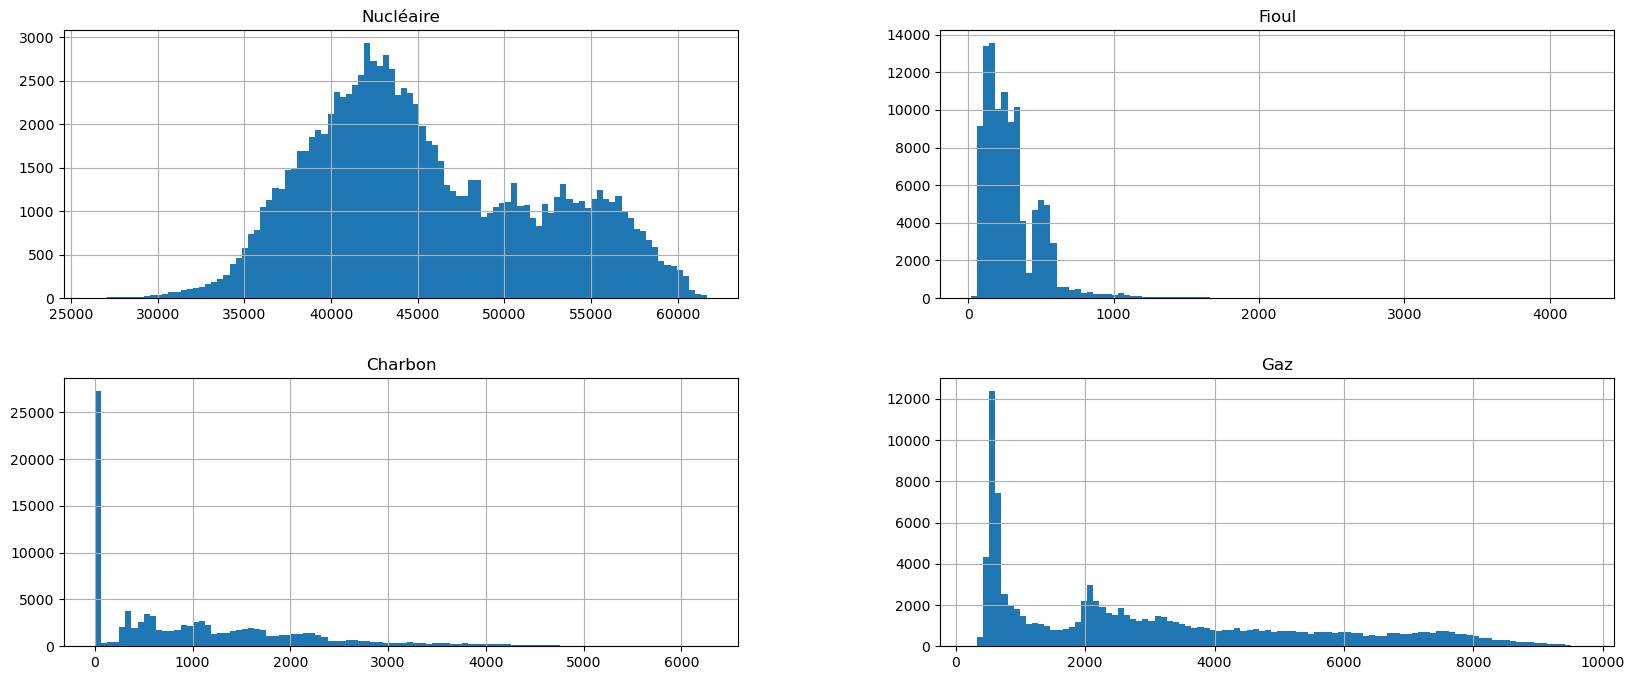

In [28]:
df_national_clean[columns_to_plot].hist(bins=100)

<Axes: >

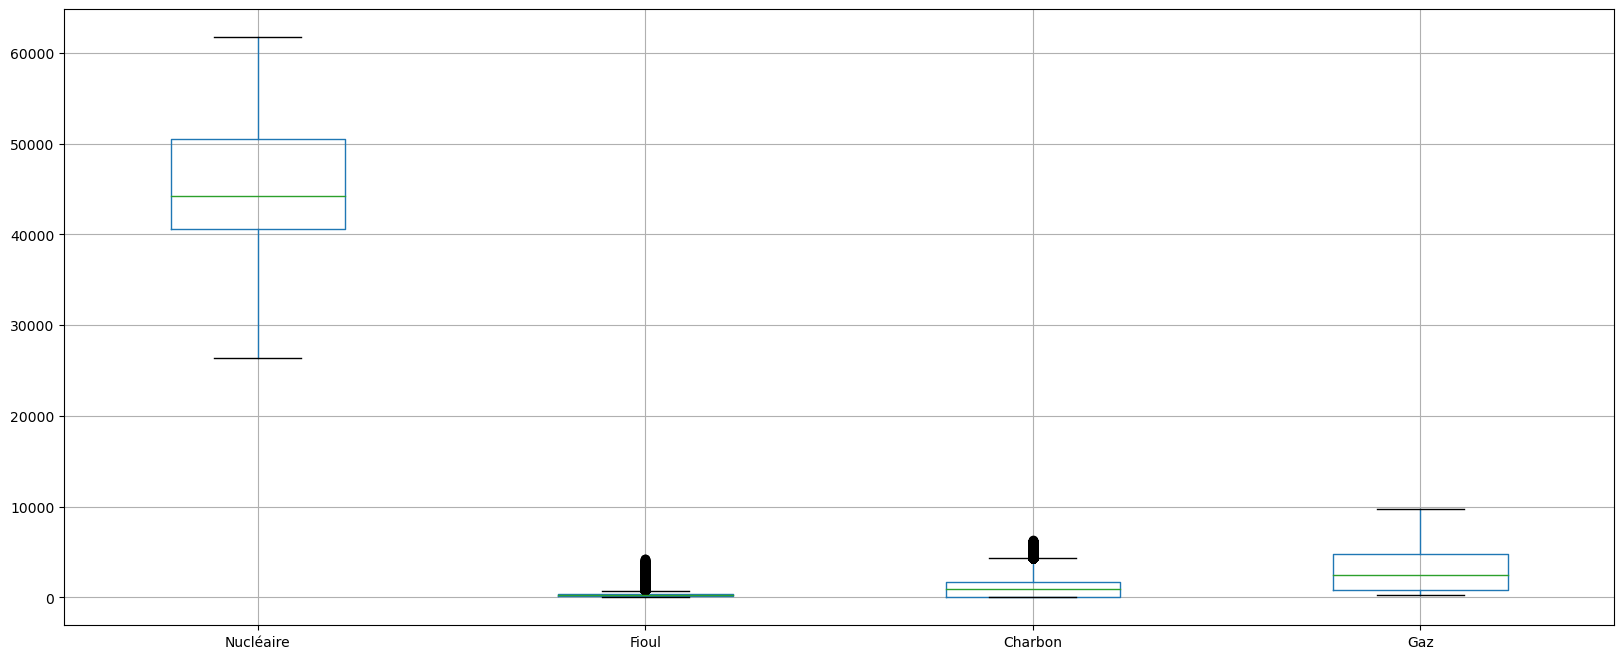

In [29]:
df_national_clean[columns_to_plot].boxplot()

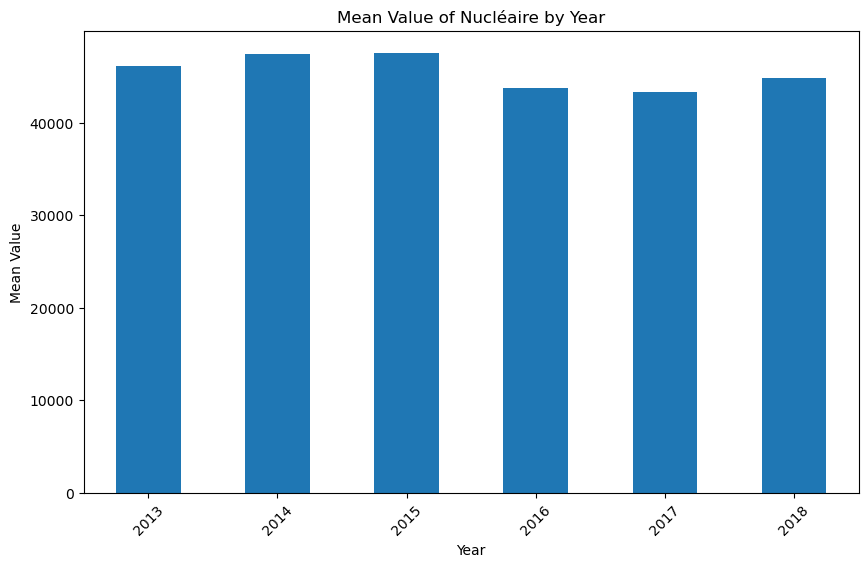

In [30]:
# Extracting the year from the index and grouping by year
grouped_by_year = df_national_clean['Nucléaire'].groupby(df_national_clean.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Nucléaire by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

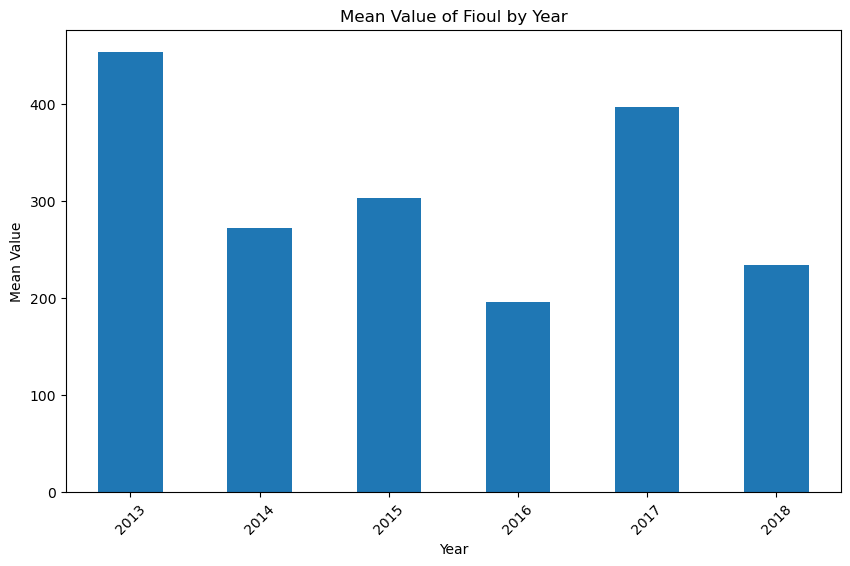

In [31]:
# Extracting the year from the index and grouping by year
grouped_by_year = df_national_clean['Fioul'].groupby(df_national_clean.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Fioul by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

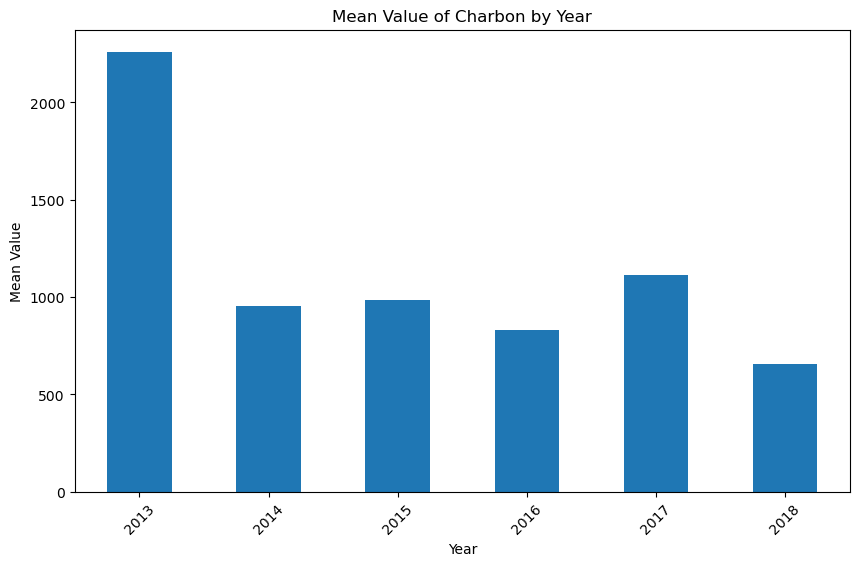

In [32]:
# Extracting the year from the index and grouping by year
grouped_by_year = df_national_clean['Charbon'].groupby(df_national_clean.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Charbon by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

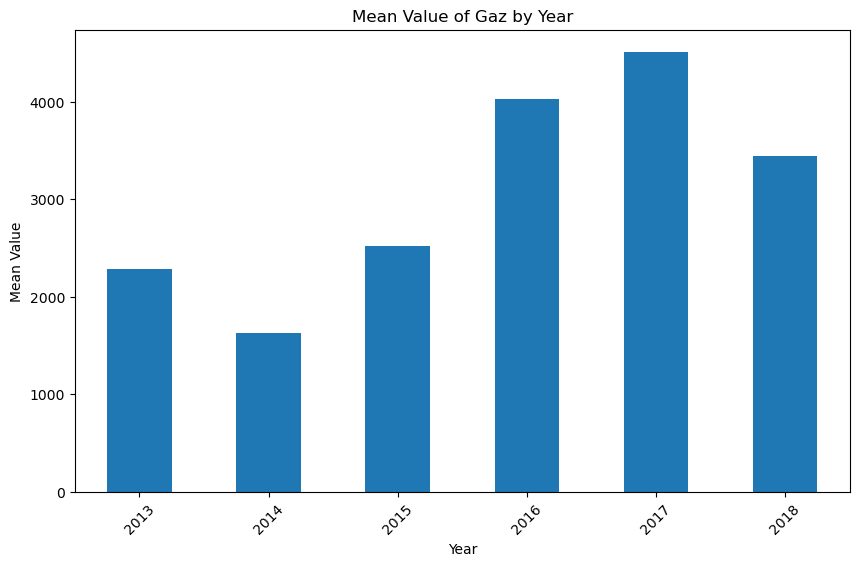

In [33]:
# Extracting the year from the index and grouping by year
grouped_by_year = df_national_clean['Gaz'].groupby(df_national_clean.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Gaz by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

In [34]:
print(df_national_clean[df_national_clean['Nucléaire'].isnull()])

Empty DataFrame
Columns: [Consommation, Prévision J-1, Prévision J, Fioul, Charbon, Gaz, Nucléaire, Eolien, Solaire, Hydraulique, Pompage, Bioénergies, Ech. physiques, Taux de Co2, Ech. comm. Angleterre, Ech. comm. Espagne, Ech. comm. Italie, Ech. comm. Suisse, Ech. comm. Allemagne-Belgique, Fioul - TAC, Fioul - Cogén., Fioul - Autres, Gaz - TAC, Gaz - Cogén., Gaz - CCG, Gaz - Autres, Hydraulique - Fil de l?eau + éclusée, Hydraulique - Lacs, Hydraulique - STEP turbinage, Bioénergies - Déchets, Bioénergies - Biomasse, Bioénergies - Biogaz]
Index: []

[0 rows x 32 columns]


In [35]:
# Define the window size for the rolling mean
window_size = 3  # You can adjust this according to your needs

# Filter out non-null values from the 'Nucléaire' column
non_null_values = df_national_clean['Nucléaire'].dropna()

# Calculate the rolling mean for non-null values
rolling_mean = non_null_values.rolling(window=window_size).mean()

# Print or use the 'rolling_mean' Series, which contains the rolling mean for the 'Nucléaire' column, considering only non-null values
print(rolling_mean)

date_time
2013-01-01 00:30:00             NaN
2013-01-01 01:00:00             NaN
2013-01-01 01:30:00    50326.666667
2013-01-01 02:00:00    50247.333333
2013-01-01 02:30:00    50187.333333
                           ...     
2018-12-31 21:30:00    55627.666667
2018-12-31 22:00:00    55562.000000
2018-12-31 22:30:00    55423.000000
2018-12-31 23:00:00    55393.000000
2018-12-31 23:30:00    55393.000000
Name: Nucléaire, Length: 105113, dtype: float64


In [36]:
df_national_clean.iloc[0]

Consommation                            59674.0
Prévision J-1                           59500.0
Prévision J                             58700.0
Fioul                                     473.0
Charbon                                     0.0
Gaz                                      3448.0
Nucléaire                               50485.0
Eolien                                   4178.0
Solaire                                     0.0
Hydraulique                              7528.0
Pompage                                   -19.0
Bioénergies                               771.0
Ech. physiques                          -7159.0
Taux de Co2                                34.0
Ech. comm. Angleterre                   -1500.0
Ech. comm. Espagne                      -1100.0
Ech. comm. Italie                        -874.0
Ech. comm. Suisse                       -1719.0
Ech. comm. Allemagne-Belgique           -1352.0
Fioul - TAC                                28.0
Fioul - Cogén.                          

## Experiments with seaborn

In [37]:
# # Import seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Apply the default theme
# sns.set_theme()

# # Load an example dataset
# #tips = sns.load_dataset("tips")

# # Create a visualization
# sns.barplot(
#     data=df_national_clean,
#     x="Consommation", y="Gaz"
# )
# plt.show()

&#x1F4A5; **Aide**


- Lire la note sur les données RTE afin de comprendre sur quelles données on travaille... On vous l'a déjà dit ? 


- La méthode `read_csv` (pandas) **peut lire les fichiers zip ;-)**


- Pour détecter l'encoding : https://chardet.readthedocs.io/en/latest/usage.html#basic-usage 


- N'écrivez pas la liste des fichiers à lire à la main, il y a plus malin ! Aller voir la méthode `listdir` du module `os` ainsi que les méthode de `string` pour analyser les "patterns" que vous souhaitez sélectionner. 


- Il existe une méthode `pd.concat` que vous devriez aller voir ! 


- Pensez à choisir les colonnes que vous souhaitez analyser. 

# Preparation of regional DF

In [38]:
list_of_regionalism_filenames = []
for filename in list_of_filenames:
    if "eCO2mix_RTE_Annuel-Definitif_" in filename:
        pass
    else :
        list_of_regionalism_filenames.append(filename)
list_of_regionalism_filenames

['eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_PACA_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Bretagne_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Grand-Est_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Grand-Est_Annuel-Definitif_2016.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2016.zip',
 'eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_P

In [39]:
list_regionalism_dfs = [] # list of dfs
for filename in list_of_regionalism_filenames:
    full_path_to_file = os.path.join(folder_path, filename)
    
    df = pd.read_csv(
        full_path_to_file, 
        encoding='ISO-8859-1', 
        sep='\t', 
        index_col=False,
        na_values= ['ND', '-','NA']
    ) # create a df

    df.drop([len(df) - 1], inplace=True) # remove the last line of the df
    list_regionalism_dfs.append(df) # save the df in the list

In [40]:
list_regionalism_dfs

[              Périmètre               Nature        Date Heures  Consommation  \
 0      Pays-de-la-Loire  Données définitives  2014-01-01  00:00        3956.0   
 1      Pays-de-la-Loire  Données définitives  2014-01-01  00:15           NaN   
 2      Pays-de-la-Loire  Données définitives  2014-01-01  00:30        3833.0   
 3      Pays-de-la-Loire  Données définitives  2014-01-01  00:45           NaN   
 4      Pays-de-la-Loire  Données définitives  2014-01-01  01:00        3661.0   
 ...                 ...                  ...         ...    ...           ...   
 35035  Pays-de-la-Loire  Données définitives  2014-12-31  22:45           NaN   
 35036  Pays-de-la-Loire  Données définitives  2014-12-31  23:00        4870.0   
 35037  Pays-de-la-Loire  Données définitives  2014-12-31  23:15           NaN   
 35038  Pays-de-la-Loire  Données définitives  2014-12-31  23:30        4687.0   
 35039  Pays-de-la-Loire  Données définitives  2014-12-31  23:45           NaN   
 
        Thermi

In [41]:
list_regionalism_dfs[4] # check that each element of the created list is a dataframe

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
0,Normandie,Données définitives,2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Normandie,Données définitives,2013-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Normandie,Données définitives,2013-01-01,00:30,3683.0,432.0,8200.0,216.0,0.0,12.0,NaN,54.0,-5233.0,NaN
3,Normandie,Données définitives,2013-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Normandie,Données définitives,2013-01-01,01:00,3549.0,433.0,8224.0,190.0,0.0,12.0,NaN,54.0,-5366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,Normandie,Données définitives,2013-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Normandie,Données définitives,2013-12-31,23:00,3952.0,373.0,10093.0,271.0,0.0,18.0,NaN,45.0,-6850.0,NaN
35037,Normandie,Données définitives,2013-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Normandie,Données définitives,2013-12-31,23:30,3791.0,373.0,9815.0,269.0,0.0,15.0,NaN,45.0,-6729.0,NaN


In [42]:
raw_regionalism_df = pd.concat(list_regionalism_dfs) # we add up all the dfs into one big one
raw_regionalism_df

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
0,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0,NaN
1,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0,NaN
3,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:00,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0,NaN
35037,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:30,9255.0,246.0,11569.0,155.0,0.0,2136.0,-1203.0,147.0,-3794.0,NaN


## Data cleaning

In [43]:
regionalism_df = raw_regionalism_df.copy() # create a copy of the original df
regionalism_df.index = pd.to_datetime(regionalism_df['Date'] + ' ' + regionalism_df['Heures']) # create a column named "date and time" and put it the date and time
regionalism_df

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
2014-01-01 00:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0,NaN
2014-01-01 00:15:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0,NaN
2014-01-01 00:45:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:00,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0,NaN
2018-12-31 23:15:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:30:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:30,9255.0,246.0,11569.0,155.0,0.0,2136.0,-1203.0,147.0,-3794.0,NaN


In [44]:
# With side effects
# secend_test_df.set_index(['date and time', 'Périmètre'], inplace=True) 
# inplace -> no return value, not chainable, side effects

# Without side effects
# Explicit modification of the data, chainable, no side effect
#regionalism_df = regionalism_df.set_index(['date and time', 'Périmètre'])
                             

In [45]:
regionalism_df.head()

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
2014-01-01 00:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0,NaN
2014-01-01 00:15:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0,NaN
2014-01-01 00:45:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0,NaN


In [46]:
regionalism_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524032 entries, 2014-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Périmètre       object 
 1   Nature          object 
 2   Date            object 
 3   Heures          object 
 4   Consommation    float64
 5   Thermique       float64
 6   Nucléaire       float64
 7   Eolien          float64
 8   Solaire         float64
 9   Hydraulique     float64
 10  Pompage         float64
 11  Bioénergies     float64
 12  Ech. physiques  float64
 13  Unnamed: 13     float64
dtypes: float64(10), object(4)
memory usage: 288.9+ MB


In [47]:
regionalism_df.sort_index() # sort the dates chronologically

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
2013-01-01 00:00:00,Bretagne,Données définitives,2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 00:00:00,PACA,Données définitives,2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 00:00:00,Hauts-de-France,Données définitives,2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 00:00:00,Normandie,Données définitives,2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 00:00:00,Pays-de-la-Loire,Données définitives,2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:45:00,Normandie,Données définitives,2018-12-31,23:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:45:00,Hauts-de-France,Données définitives,2018-12-31,23:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:45:00,PACA,Données définitives,2018-12-31,23:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:45:00,Centre-Val de Loire,Données définitives,2018-12-31,23:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
regionalism_df.drop(["Nature", "Date", "Heures", "Unnamed: 13"], inplace=True, axis=1)
# axis=1 means that i want to drop columns, and not lines

In [49]:
regionalism_df

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
2014-01-01 00:00:00,Pays-de-la-Loire,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0
2014-01-01 00:15:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,Pays-de-la-Loire,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0
2014-01-01 00:45:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,Pays-de-la-Loire,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,Auvergne-Rhône-Alpes,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0
2018-12-31 23:15:00,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:30:00,Auvergne-Rhône-Alpes,9255.0,246.0,11569.0,155.0,0.0,2136.0,-1203.0,147.0,-3794.0


In [50]:
cols = [ 'Périmètre', 'Date', 'Heures', 'Consommation', 'Thermique',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Ech. physiques'
]

regionalism_df = regionalism_df.dropna(subset='Consommation')

regionalism_df

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
2014-01-01 00:00:00,Pays-de-la-Loire,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0
2014-01-01 00:30:00,Pays-de-la-Loire,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0
2014-01-01 01:00:00,Pays-de-la-Loire,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0
2014-01-01 01:30:00,Pays-de-la-Loire,3707.0,138.0,NaN,278.0,0.0,2.0,NaN,46.0,3243.0
2014-01-01 02:00:00,Pays-de-la-Loire,3746.0,138.0,NaN,282.0,0.0,2.0,NaN,47.0,3276.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,Auvergne-Rhône-Alpes,8596.0,245.0,11665.0,201.0,0.0,2044.0,-1625.0,147.0,-4081.0
2018-12-31 22:00:00,Auvergne-Rhône-Alpes,8456.0,245.0,11620.0,217.0,0.0,2088.0,-1713.0,146.0,-4148.0
2018-12-31 22:30:00,Auvergne-Rhône-Alpes,8716.0,245.0,11588.0,199.0,0.0,1996.0,-1695.0,146.0,-3763.0
2018-12-31 23:00:00,Auvergne-Rhône-Alpes,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0


In [51]:
# Set of Regions
regionalism_df['Périmètre'].unique()

array(['Pays-de-la-Loire', 'PACA', 'Hauts-de-France', 'Normandie',
       'Bretagne', 'Occitanie', 'Grand-Est', 'Ile-de-France',
       'Centre-Val de Loire', 'Auvergne-Rhône-Alpes',
       'Nouvelle-Aquitaine', 'Bourgogne-Franche-Comté'], dtype=object)

In [52]:
# Do I have the number of values for each region ?
regionalism_df['Périmètre'].value_counts()

Périmètre
Pays-de-la-Loire           105167
PACA                       105167
Hauts-de-France            105167
Normandie                  105167
Bretagne                   105167
Occitanie                  105167
Grand-Est                  105167
Ile-de-France              105167
Centre-Val de Loire        105167
Auvergne-Rhône-Alpes       105167
Nouvelle-Aquitaine         105167
Bourgogne-Franche-Comté    105167
Name: count, dtype: int64

In [53]:
regionalism_df.to_pickle('./data_shahaf_rte_regional.pkl')

# Analaysis of regionalism

In [54]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 8

In [55]:
regionalism_df = pd.read_pickle('./data_shahaf_rte_regional.pkl')

In [56]:
regionalism_df.index.year.unique()

Index([2014, 2018, 2013, 2017, 2015, 2016], dtype='int32')

<Axes: ylabel='Périmètre'>

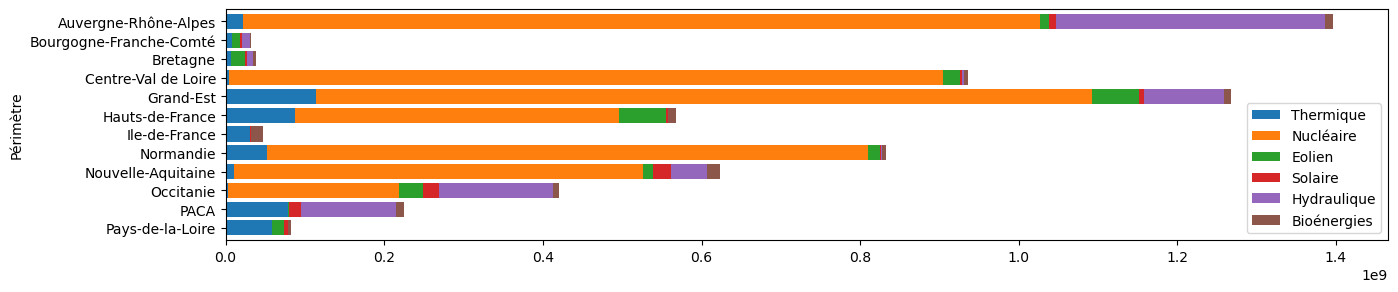

In [57]:
#.drop- we throw out the columns that are not relevant for us
#.groupby- group together identical parameters in a column in to one row.
#.sum- tells him how to unite. in this case ther will be a sum 
#of the vlues in the next column that are relevant to the current column was reduced 
#sort_index will sort the index
#plot bar h - creates the graph.




(
regionalism_df.drop(columns=['Ech. physiques', 'Consommation', 'Pompage'])
               .groupby('Périmètre')
               .sum()
               .sort_index(ascending=False)
               .plot.barh(
                   stacked=True,
                   figsize=(15, 3),
                   width= 0.8
               )
)

In [58]:
regionalism_df = regionalism_df.sort_index()
regionalism_df

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
2013-01-01 00:30:00,Bretagne,3050.0,58.0,NaN,107.0,0.0,86.0,-1.0,20.0,2779.0
2013-01-01 00:30:00,PACA,5570.0,537.0,NaN,12.0,0.0,1412.0,0.0,58.0,3548.0
2013-01-01 00:30:00,Pays-de-la-Loire,3595.0,127.0,NaN,182.0,0.0,0.0,NaN,32.0,3252.0
2013-01-01 00:30:00,Hauts-de-France,5989.0,828.0,4499.0,1115.0,0.0,1.0,NaN,69.0,-525.0
2013-01-01 00:30:00,Normandie,3683.0,432.0,8200.0,216.0,0.0,12.0,NaN,54.0,-5233.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:30:00,PACA,6502.0,454.0,NaN,27.0,0.0,741.0,-51.0,111.0,5220.0
2018-12-31 23:30:00,Normandie,3677.0,351.0,6993.0,46.0,0.0,15.0,NaN,50.0,-3778.0
2018-12-31 23:30:00,Hauts-de-France,5847.0,955.0,5482.0,319.0,0.0,2.0,0.0,123.0,-1034.0
2018-12-31 23:30:00,Centre-Val de Loire,2587.0,80.0,10110.0,18.0,0.0,2.0,NaN,56.0,-7679.0


In [59]:
regionalism_df['Périmètre'].value_counts()


Périmètre
Bretagne                   105167
PACA                       105167
Pays-de-la-Loire           105167
Hauts-de-France            105167
Normandie                  105167
Nouvelle-Aquitaine         105167
Centre-Val de Loire        105167
Occitanie                  105167
Grand-Est                  105167
Bourgogne-Franche-Comté    105167
Ile-de-France              105167
Auvergne-Rhône-Alpes       105167
Name: count, dtype: int64

In [60]:
regionalism_df.columns


Index(['Périmètre', 'Consommation', 'Thermique', 'Nucléaire', 'Eolien',
       'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies', 'Ech. physiques'],
      dtype='object')

In [61]:
mask = regionalism_df.Périmètre == 'Pays-de-la-Loire'
mask

2013-01-01 00:30:00    False
2013-01-01 00:30:00    False
2013-01-01 00:30:00     True
2013-01-01 00:30:00    False
2013-01-01 00:30:00    False
                       ...  
2018-12-31 23:30:00    False
2018-12-31 23:30:00    False
2018-12-31 23:30:00    False
2018-12-31 23:30:00    False
2018-12-31 23:30:00    False
Name: Périmètre, Length: 1262004, dtype: bool

In [62]:
mask_index = regionalism_df.index.year == 2014
mask_index

array([False, False, False, ..., False, False, False])

In [63]:
#filtr = regionalism_df.loc[(regionalism_df.Périmètre == 'Pays-de-la-Loire') & (regionalism_df.index.year == 2014), :] 
#filtr

### Graph of one area's consumption against solar and wind production 

## preparing the df

In [64]:
filtr_only_Bretagne = regionalism_df.loc[(regionalism_df.Périmètre == 'Bretagne'), ['Consommation', 'Solaire', 'Eolien'] ]
filtr_only_Bretagne 

window_size = 3  # You can adjust this according to your needs
# Calculate the rolling mean for non-null values
rolling_mean_Bretagne =filtr_only_Bretagne.rolling(window=window_size).mean()
rolling_mean_Bretagne

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,2883.666667,0.0,114.666667
2013-01-01 02:00:00,2825.000000,0.0,125.333333
2013-01-01 02:30:00,2821.666667,0.0,140.333333
...,...,...,...
2018-12-31 21:30:00,2787.333333,0.0,4.000000
2018-12-31 22:00:00,2774.333333,0.0,5.333333
2018-12-31 22:30:00,2801.666667,0.0,6.000000
2018-12-31 23:00:00,2945.333333,0.0,6.333333


<Axes: title={'center': 'Bretagne!'}>

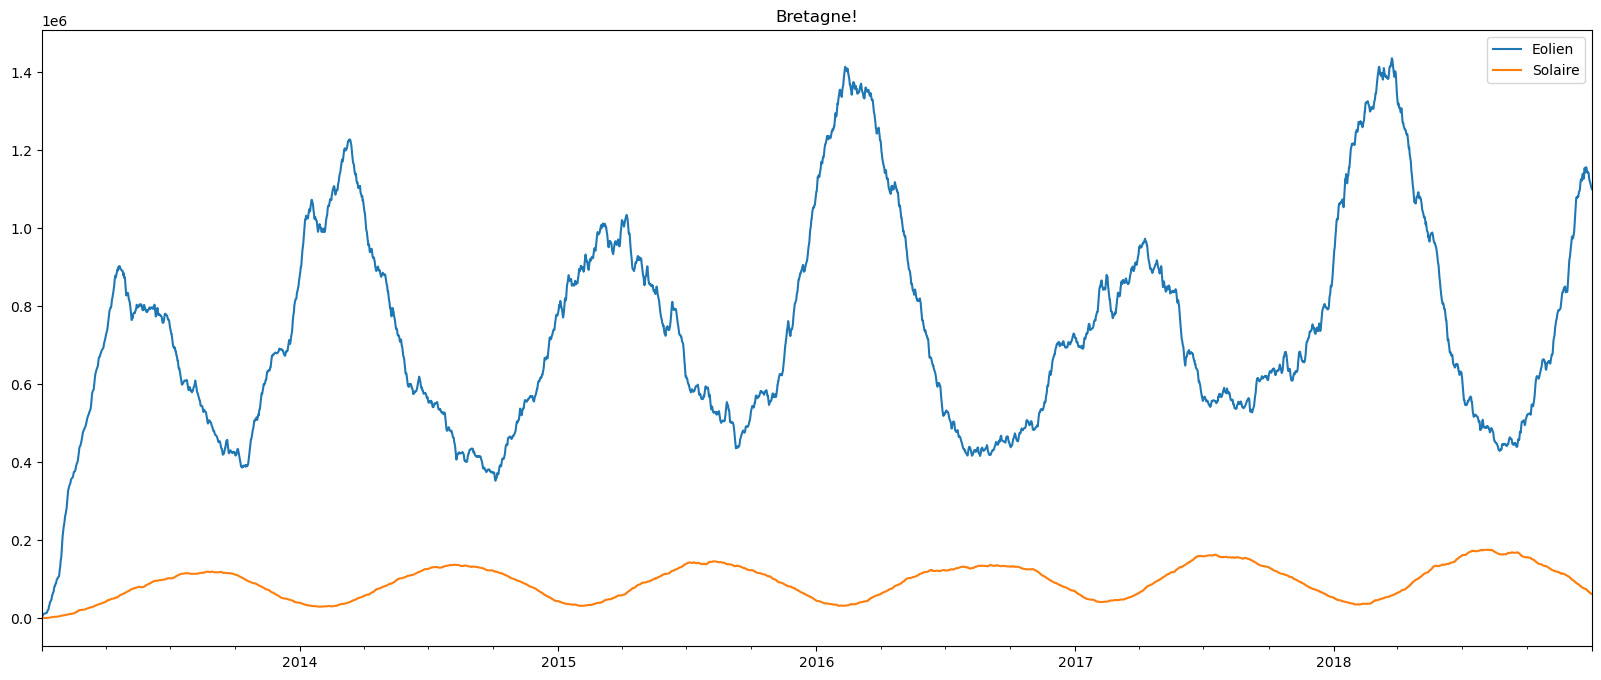

In [94]:
filtr_only_Bretagne[['Eolien', 'Solaire']].rolling('90D').sum().plot(title="Bretagne!")

In [86]:
filtr_only_Pays_de_la_Loire = regionalism_df.loc[(regionalism_df.Périmètre == 'Pays-de-la-Loire'), ['Consommation', 'Solaire', 'Eolien'] ]
filtr_only_Pays_de_la_Loire

window_size = 3  # You can adjust this according to your needs
# Calculate the rolling mean for non-null values
rolling_mean_Bretagne =filtr_only_Pays_de_la_Loire.rolling(window=window_size).mean()
rolling_mean_Bretagne

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,3422.333333,0.0,147.333333
2013-01-01 02:00:00,3351.666667,0.0,128.333333
2013-01-01 02:30:00,3280.666667,0.0,124.666667
...,...,...,...
2018-12-31 21:30:00,3256.333333,0.0,68.666667
2018-12-31 22:00:00,3170.666667,0.0,65.666667
2018-12-31 22:30:00,3165.333333,0.0,60.333333
2018-12-31 23:00:00,3362.333333,0.0,55.000000


<Axes: title={'center': 'Pays_de_la_Loire'}>

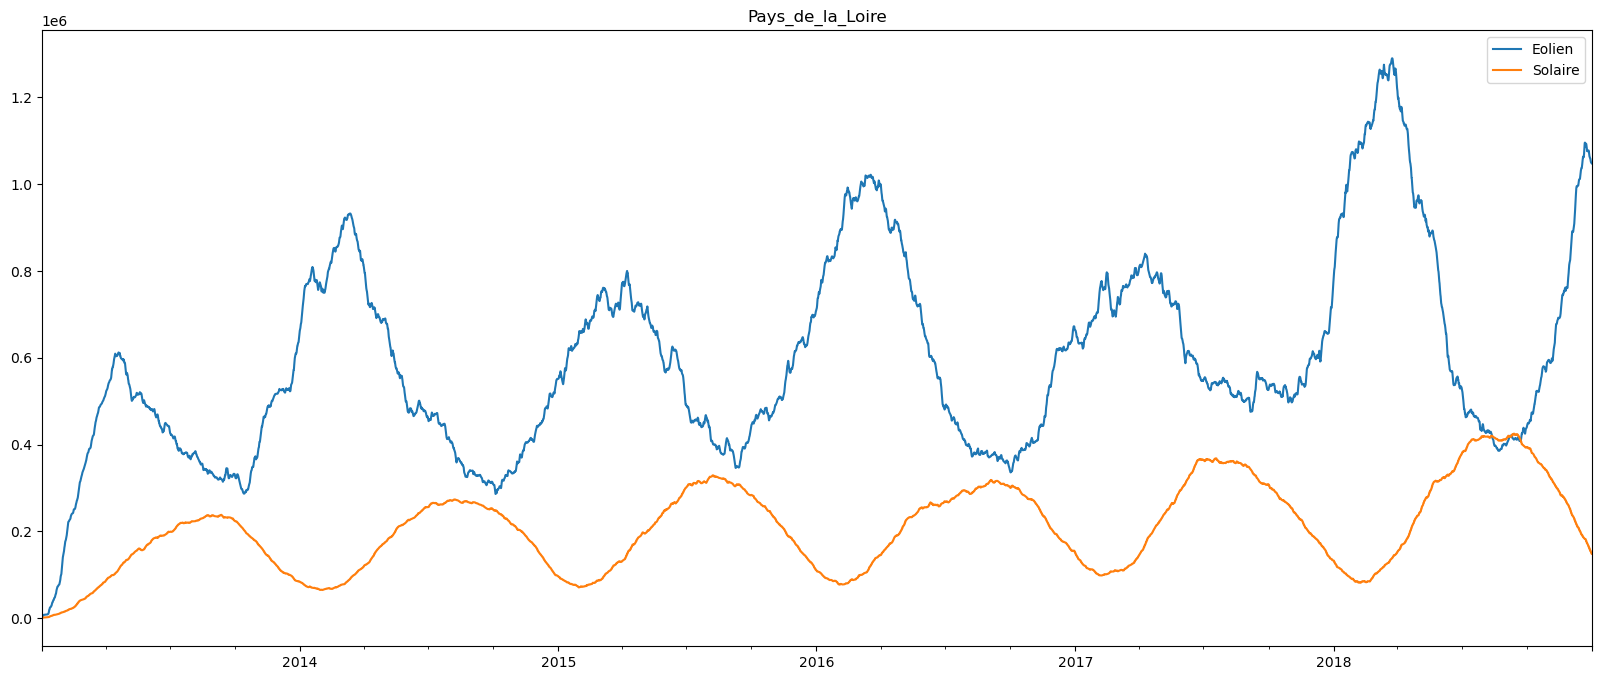

In [91]:
filtr_only_Pays_de_la_Loire[['Eolien', 'Solaire']].rolling('90D').sum().plot(title="Pays_de_la_Loire")

In [88]:
filtr_Auvergne_Rhone_Alpes = regionalism_df.loc[(regionalism_df.Périmètre == 'Auvergne-Rhône-Alpes'), ['Consommation', 'Solaire', 'Eolien'] ]
filtr_Auvergne_Rhone_Alpes

window_size = 3  # You can adjust this according to your needs
# Calculate the rolling mean for non-null values
rolling_mean_Bretagne =filtr_Auvergne_Rhone_Alpes.rolling(window=window_size).mean()
rolling_mean_Bretagne

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,8004.333333,0.0,253.666667
2013-01-01 02:00:00,7907.333333,0.0,249.333333
2013-01-01 02:30:00,7895.666667,0.0,245.333333
...,...,...,...
2018-12-31 21:30:00,8746.000000,0.0,202.333333
2018-12-31 22:00:00,8603.666667,0.0,207.666667
2018-12-31 22:30:00,8589.333333,0.0,205.666667
2018-12-31 23:00:00,8731.333333,0.0,194.333333


<Axes: title={'center': 'Auvergne_Rhone_Alpes!'}>

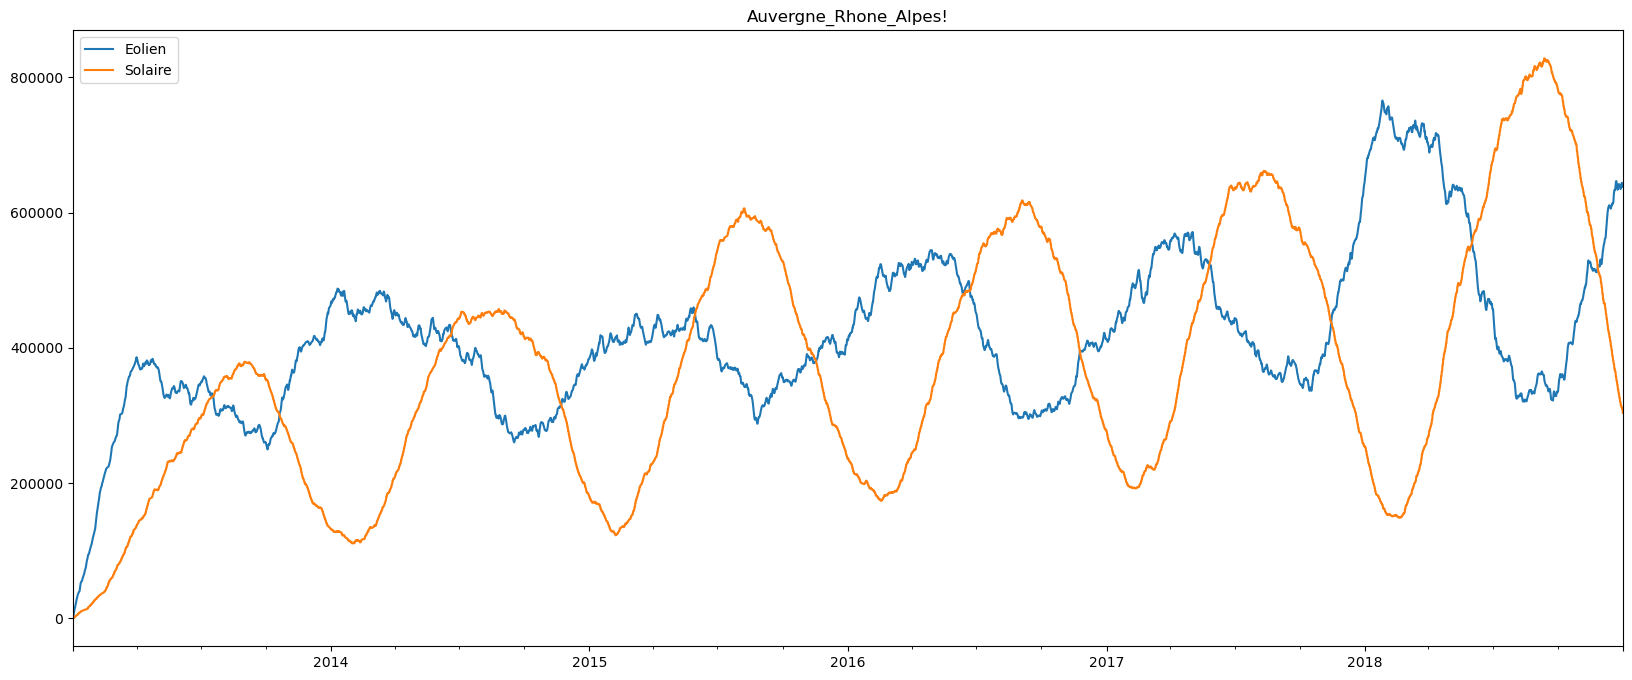

In [90]:
filtr_Auvergne_Rhone_Alpes[['Eolien', 'Solaire']].rolling('90D').sum().plot(title="Auvergne_Rhone_Alpes!")

In [68]:
filtr_Auvergne_Rhone_Alpes['Solaire'].value_counts()

Solaire
0.0      52592
1.0       1379
2.0        626
3.0        496
4.0        429
         ...  
661.0        1
644.0        1
650.0        1
666.0        1
670.0        1
Name: count, Length: 670, dtype: int64

In [82]:
filtr_Nouvelle_Aquitaine = regionalism_df.loc[(regionalism_df.Périmètre == 'Nouvelle-Aquitaine'), ['Consommation', 'Solaire', 'Eolien'] ]
filtr_Nouvelle_Aquitaine

window_size = 3  # You can adjust this according to your needs
# # Calculate the rolling mean for non-null values
rolling_mean_Nouvelle_Aquitaine =filtr_Nouvelle_Aquitaine.rolling(window=window_size).mean()
rolling_mean_Nouvelle_Aquitaine

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,5466.666667,0.0,176.666667
2013-01-01 02:00:00,5459.666667,0.0,169.666667
2013-01-01 02:30:00,5491.000000,0.0,156.000000
...,...,...,...
2018-12-31 21:30:00,6359.666667,0.0,170.666667
2018-12-31 22:00:00,6262.000000,0.0,171.666667
2018-12-31 22:30:00,6256.000000,0.0,185.333333
2018-12-31 23:00:00,6379.000000,0.0,207.666667


In [83]:
filtr_Grand_Est = regionalism_df.loc[(regionalism_df.Périmètre == 'Grand-Est'), ['Consommation', 'Solaire', 'Eolien'] ]
filtr_Grand_Est

window_size = 3  # You can adjust this according to your needs
# # Calculate the rolling mean for non-null values
rolling_mean_Grand_Est =filtr_Grand_Est.rolling(window=window_size).mean()
rolling_mean_Grand_Est

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,4864.666667,0.0,1129.666667
2013-01-01 02:00:00,4849.333333,0.0,1172.666667
2013-01-01 02:30:00,4864.000000,0.0,1217.000000
...,...,...,...
2018-12-31 21:30:00,5083.333333,0.0,80.666667
2018-12-31 22:00:00,5018.000000,0.0,68.333333
2018-12-31 22:30:00,5006.666667,0.0,62.666667
2018-12-31 23:00:00,5030.666667,0.0,56.666667


In [ ]:
filtr_only_Pays_de_la_Loire.columns

In [ ]:
# Define the window size for the rolling mean
window_size = 3  # You can adjust this according to your needs



filtr_only_Pays_de_la_Loire.plot.barh(
                   stacked=True,
                   figsize=(15, 3),
                   width= 0.8)

In [69]:
# Define the window size for the rolling mean
window_size = 3  # You can adjust this according to your needs
# Calculate the rolling mean for non-null values
rolling_mean =filtr_only_Pays_de_la_Loire.rolling(window=window_size).mean()
rolling_mean

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,3422.333333,0.0,147.333333
2013-01-01 02:00:00,3351.666667,0.0,128.333333
2013-01-01 02:30:00,3280.666667,0.0,124.666667
...,...,...,...
2018-12-31 21:30:00,3256.333333,0.0,68.666667
2018-12-31 22:00:00,3170.666667,0.0,65.666667
2018-12-31 22:30:00,3165.333333,0.0,60.333333
2018-12-31 23:00:00,3362.333333,0.0,55.000000


<Axes: title={'center': 'it works!'}>

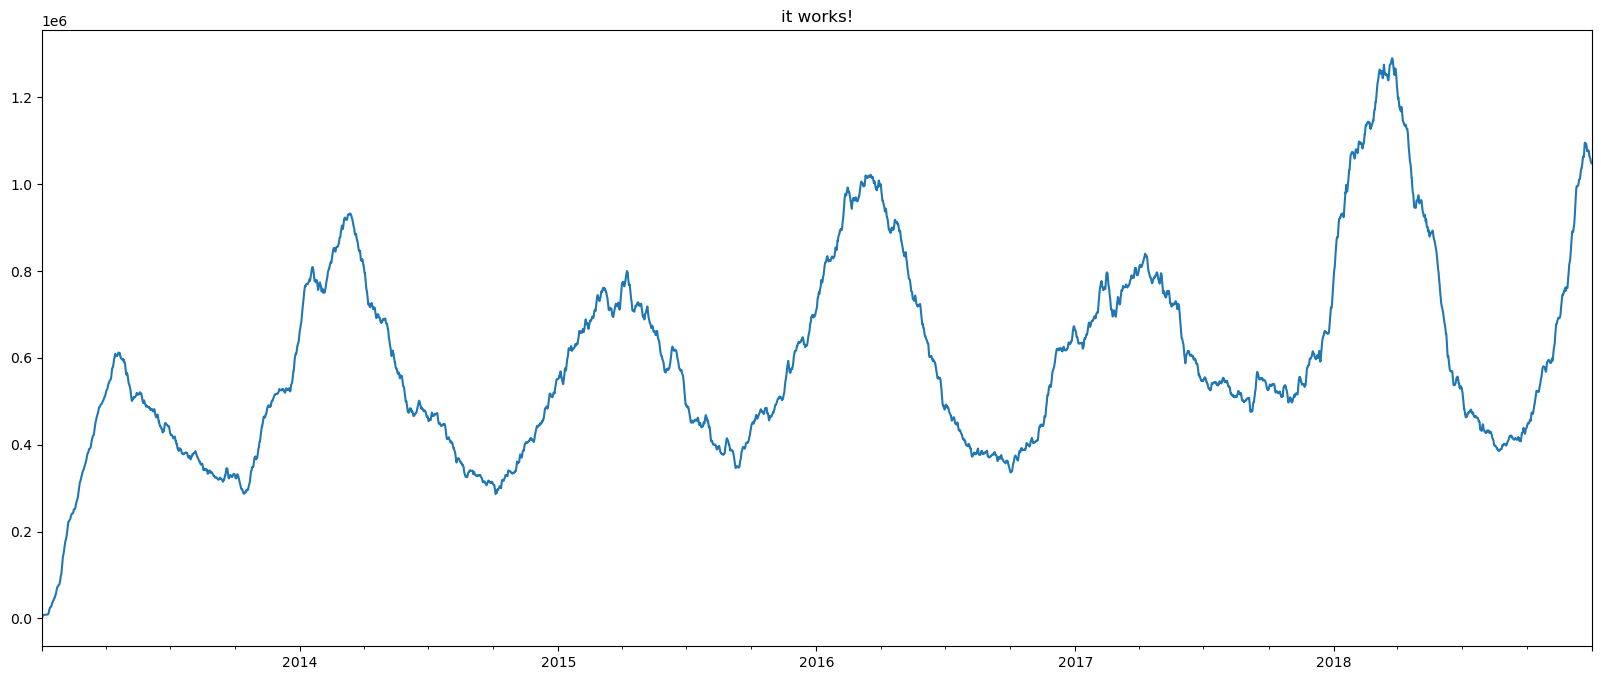

In [70]:
filtr_only_Pays_de_la_Loire['Eolien'].rolling('90D').sum().plot(title="it works!")

<Axes: title={'center': 'it works!'}>

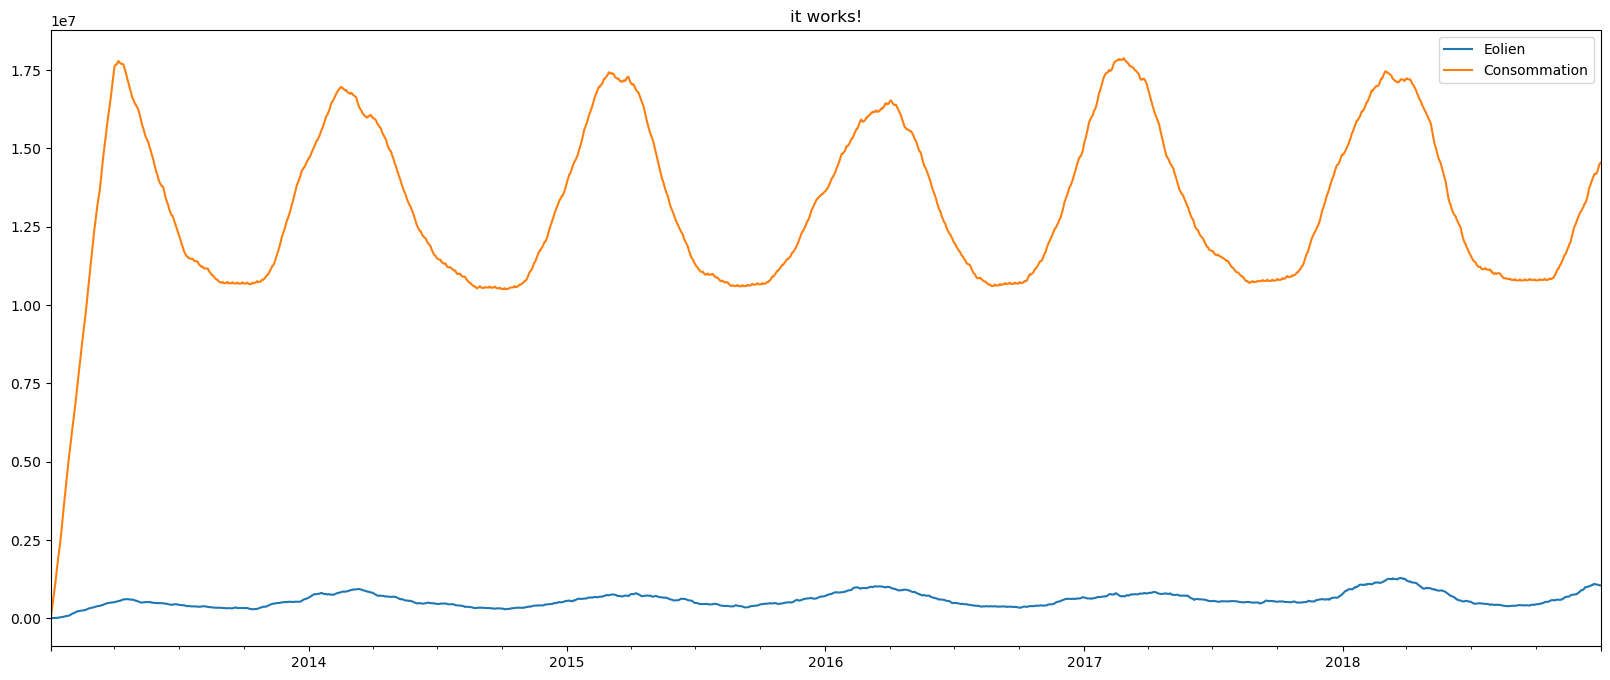

In [71]:
filtr_only_Pays_de_la_Loire[['Eolien', 'Consommation']].rolling('90D').sum().plot(title="it works!")

In [79]:
%whos

Variable                        Type                          Data/Info
-----------------------------------------------------------------------
cols                            list                          n=12
column_list                     list                          n=32
columns_to_plot                 list                          n=4
df                              DataFrame                                       Périmèt<...>[35040 rows x 14 columns]
df_national_clean               DataFrame                                          Cons<...>105113 rows x 32 columns]
file_name                       str                           data_rte/eCO2mix_RTE_Annuel-Definitif_2017.zip
filename                        str                           eCO2mix_RTE_Auvergne-Rhôn<...>Annuel-Definitif_2018.zip
filtr_Auvergne_Rhone_Alpes      DataFrame                                          Cons<...>[105167 rows x 3 columns]
filtr_Grand_Est                 DataFrame                                  

In [80]:
window_size = 3  # You can adjust this according to your needs
# Calculate the rolling mean for non-null values
rolling_mean_Auvergne_Rhone_Alpes = filtr_Auvergne_Rhone_Alpes.rolling(window=window_size).mean()
rolling_mean_Auvergne_Rhone_Alpes

,Consommation,Solaire,Eolien
2013-01-01 00:30:00,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN
2013-01-01 01:30:00,8004.333333,0.0,253.666667
2013-01-01 02:00:00,7907.333333,0.0,249.333333
2013-01-01 02:30:00,7895.666667,0.0,245.333333
...,...,...,...
2018-12-31 21:30:00,8746.000000,0.0,202.333333
2018-12-31 22:00:00,8603.666667,0.0,207.666667
2018-12-31 22:30:00,8589.333333,0.0,205.666667
2018-12-31 23:00:00,8731.333333,0.0,194.333333


In [ ]:
regionalism_df.iloc[:10, 2:5]

In [ ]:
filt = regionalism_df.loc['2014', 'Thermique':'Eolien'] 
filt

In [ ]:
Pays_de_la_Loire = (sorted_by_regionalism_df['Périmètre'] == 'Pays_de_la_Loire')

In [ ]:
sorted_by_regionalism_df=(
regionalism_df.drop(columns=['Ech. physiques', 'Consommation', 'Pompage'])
               .groupby('Périmètre')
               .sum()
               .sort_index(ascending=False)
)

In [ ]:
sorted_by_regionalism_df

## Exploration du dataset National

### Réflexion

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et explorer les premières statistiques descriptives : 
- Quelles questions vous posez-vous sur les données ? 

- Qu'avez-vous envie d'explorer ? (essayez de ne pas vous laisser biaiser par les titres du Notebook)

### Mise en application

&#x1F4A5; **To Do**
    
L'objectif ici est de **comprendre les données** présentes dans le dataset national que vous avez créé. Réfléchissez aux descripteurs statistiques les plus appropiés pour chaque question.  

**Dataset national**

- Tracer la consommation nationale en fonction du temps (choisir plusieurs durées pour afficher vos données : une semaine, un mois, un an, durée totale, ... ) 
      

- Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ? Regardez bien vos colonnnes, cherchez à comprendre les colonnes que vous pouvez rassembler et sommer. 


- Comparer la production totale française à la consommation totale. Quelle est la proportion du temps où la France est autonome . 


- Afficher sur un même graphique : la production totale française, la consommation totale et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
 
 
- Quelles sources ont un fonctionnement
    - de "base" (production régulière) ? => les sources qu'on ne peut pas maîtriser
    - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ? => les sources qu'on peut actionner si besoin
 
 
- Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence. <br>
Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 


<br> 



**Aide**
- la méthode `.plot()` fonctionne parfaitement avec un datetime en index
- si vous utilisez un multiindex, la méthode `swaplevel` peut vous aider
- attention aux `NaN` pour les plots.

## Exploration du dataset Régional

### Réflexion

Attention à bien nuancer nos propos dans cette partie là : chaque région n'est pas égale en population, en superficie,... 
- https://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions-departements/
- https://www.regions-departements-france.fr/regions-francaises.html

Pensez à réflechir à d'autres critères de comparaison reflétants ces disparités.   

In [ ]:
# secend_columns_to_plot = ['Nucléaire', 'Eolien', 'Solaire', 'Hydraulique']
# secend_test_df[secend_columns_to_plot].dropna().plot(alpha=0.5)
# plt.title("Energy Sources Data")
# #plt.scatter(test_df.index, test_df[columns_to_plot], color="orangered", s=20)
# plt.show()

### Analyse générale

On va commencer par une première exploration générale des données. 


&#x1F4A5; **To Do**


    - Tracer sur un même graphique la consommation des différentes régions en fonction du temps
    
    - Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)
    
    - Quelles régions sont les plus consommatrices ? Même question en ramenant la réponse au nombre d'habitants ? Même question en ramenant la réponse au km2 ? Que pouvez-vous dire des résultats ? 
        
<br> 

**Ressources :** 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html

### Etude de la production non renouvelable. 

&#x1F4A5; **To Do**

    - Dans quelles régions produit-t-on le plus d'électricité d'origine non renouvelable ? 
    
    - Quelle est l'évolution de la production d'électricité d'origine non renouvelable ? 
    
    - Afficher la production nucléaire totale par région sur l'ensemble de la période . Dans quelles régions sont situées les centrales nucléaires ? Dans quelles régions n'y a-t-il pas de centrale nucléaire ?   

### Etude de la production renouvelable


&#x1F4A5; **To Do**

    - Quelle région produit le plus d'électricité d'origine renouvelable ?

    - Quelle évolution sur les dernières années ? Faîtes un joli graphique. 
   
    - Quelle région a le meilleur taux " énergie produite VS puissance installée " ? 
    Vous pourrez assimiler la puissance installée comme étant égale au maximum produit. Attention à bien définir vos critères, cette capacité peut augmenter dans le temps...

### Autonomie électrique des régions

&#x1F4A5; **To Do**

    - Afficher la différence entre la consommation et la production pour chaque région. 
    
    - Quelles régions sont autonomes ? En excès ? En déficit ?
    
    - Comparer ce résultat à la colonne 'Ech. physiques'
    
    - Afficher un histogramme de l'écart entre énergie produite et consommée. Calculer la moyenne et la variance de cet écart.  
        
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?